# Predictions on Trained Model

In [3]:
from keras.models import load_model
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , Dropout , AveragePooling3D
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading The Trained Model

In [4]:
model = load_model('models/Epilepsy.h5')

# Data Handling

Importing data using pandas into a dataframe

In [5]:
df=pd.read_csv('datasets/data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [6]:
X=df.values[:,1:-1]

# Splitting the data into training and testing sets

using `sklearn.model_selection.train_test_split` we split the data into training and testing sets with a test size of 20%

In [7]:
y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [8]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)

X_train.shape
X_test.shape

(2300, 178, 1)

# Accuracy on Validation Dataset

Predicts the output labels for the validation dataset using the trained model. It selects every fourth feature from the validation dataset performs feature scaling by subtracting the mean and dividing by the standard deviation and converts the data type of the input to float32

In [9]:
ypred=model.predict(((X_test[:,::4]-X_test.mean())/X_test.std()).astype('float32'))
ypred.shape

72/72 [==============================] - 5s 9ms/step


(2300, 5)

#

Creates an array yp filled with zeros, with the length equal to the number of samples in the validation set the array is filled with ones, with the length equal to the number of samples in the validation set.

In [10]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

#

Assigns the predicted class label for the i-th sample by finding the index of the maximum value in the predicted output array ypred[i] and adding 1 to it. Then assigns the true class label for the i-th sample by finding the index of the maximum value in the true label array Y_test[i]. The loop is iterated over the indices of samples in the validation

In [11]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

#

Returns the shape of the arrays yp and yo.

In [12]:
yp.shape

(2300,)

In [13]:
yo.shape

(2300,)

#

Returns the unique elements in the arrays yp and yo.

In [14]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [15]:
np.unique(yp)

array([1., 2., 3., 4., 5.])

#

The loop iterates over the elements in yo and yp arrays. It checks if the value at index 'i' in 'yo' or 'yp' is not equal to '1'. If it is not equal to '1', it sets the value at that index to '0'.

In [16]:
#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

#

Returns the unique elements in the arrays yp and yo.

In [17]:
np.unique(yo)

array([0., 1.])

In [18]:
np.unique(yp)

array([0., 1.])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(yo,yp)

0.9895652173913043

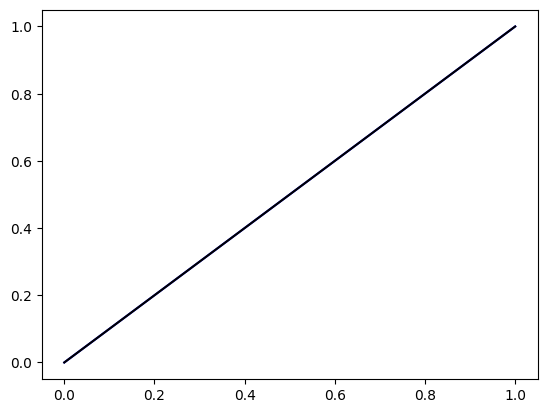

In [21]:
plt.plot(np.unique(yo),'b')
plt.plot(np.unique(yp), 'black')


plt.show()

# Accuracy on Training Dataset

In [22]:
ypred1=model.predict(((X_train[:,::4]-X_train.mean())/X_train.std()).astype('float32'))
ypred1.shape

288/288 [==============================] - 3s 9ms/step


(9200, 5)

In [23]:
yp1=np.zeros((Y_train.shape[0]))
yo1=np.ones((Y_train.shape[0]))

In [24]:
for i in range(Y_train.shape[0]):
    yp1[i]=np.argmax(ypred1[i])+1
    yo1[i]=np.argmax(Y_train[i])

In [25]:
yp1.shape

(9200,)

In [26]:
yo1.shape

(9200,)

In [27]:
np.unique(yo1)

array([1., 2., 3., 4., 5.])

In [28]:
np.unique(yp1)

array([1., 2., 3., 4., 5.])

In [29]:
#conversion of classes
for i in range(Y_train.shape[0]):
    if yo1[i]!=1:
        yo1[i]=0
    if yp1[i]!=1:
        yp1[i]=0

In [30]:
np.unique(yo1)

array([0., 1.])

In [31]:
np.unique(yp1)

array([0., 1.])

In [32]:
accuracy_score(yo1,yp1)

0.9986956521739131